In [1]:
import numpy as np
import scipy.spatial.distance as sd
import matplotlib.pyplot as plt
from tesser import network
from tesser import sr

n_voxel = 100
n_state = 21

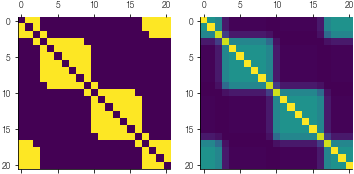

In [2]:
df = network.temp_node_info()
adj = network.adjacency_mat(df)
srm = sr.compute_limit_matrix(.9, adj, n_state)
fig, ax = plt.subplots(1, 2)
ax[0].matshow(adj);
ax[1].matshow(srm);

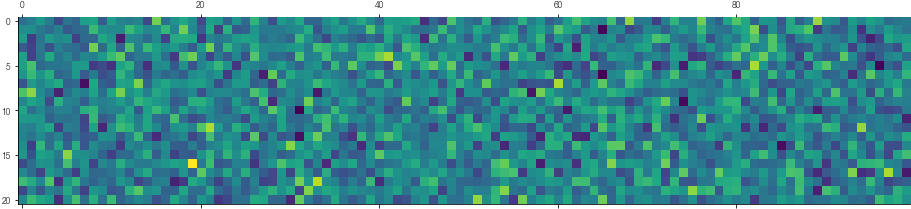

In [3]:
patterns = np.random.normal(size=(n_state, n_voxel))
plt.matshow(patterns)

In [4]:
from scipy import stats
stats.pearsonr(patterns[0], patterns[1])

(-0.018546242865778297, 0.854683115818835)

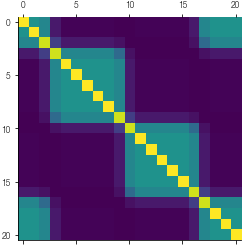

In [5]:
plt.matshow(srm @ np.eye(n_state))

In [6]:
srm_nd = srm.copy()
srm_nd[np.eye(n_state) == 1] = 0
learned_patterns = srm_nd @ patterns
estimated_patterns = srm_nd @ learned_patterns

In [7]:
learned_patterns.shape

(21, 100)

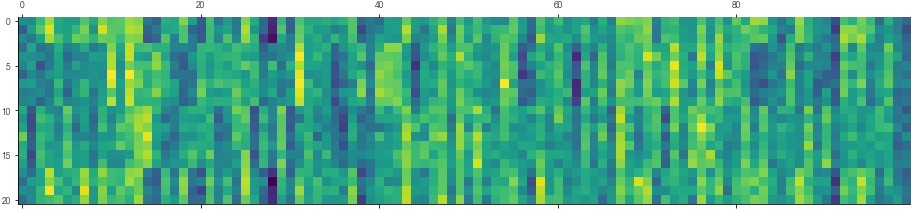

In [50]:
plt.matshow(learned_patterns)

In [15]:
import pandas as pd
file = '/Users/morton/Downloads/tesser_100_run1_info.txt'
data = pd.read_csv(file, names=['trial', 'onset', 'tr', 'phase', 'trial_type', 'zeros'])
data['duration'] = 1
data

,trial,onset,tr,phase,trial_type,zeros,duration
0,1,0,0,0,0,0,1
1,2,2,1,0,0,0,1
2,3,4,2,1,18,0,1
3,4,6,3,1,20,0,1
4,5,12,6,1,3,0,1
...,...,...,...,...,...,...,...
146,147,580,290,1,5,0,1
147,148,586,293,1,7,0,1
148,149,590,295,1,8,0,1
149,150,592,296,0,0,0,1


In [21]:
events = data.query('trial_type != 0').copy()
frame_times = np.arange(0, 600, 2)
mat = dm.make_first_level_design_matrix(frame_times, events, high_pass=1/256)

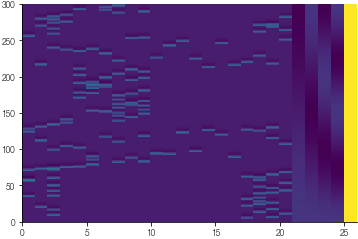

In [23]:
import matplotlib.pyplot as plt
plt.pcolor(mat)

In [35]:
m = mat.to_numpy()
sim = m[:, :21] @ learned_patterns

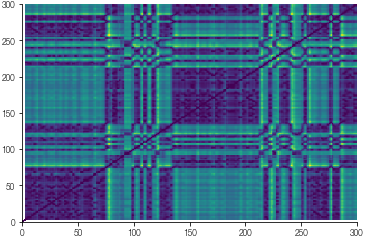

In [36]:
import scipy.spatial.distance as sd
plt.pcolor(sd.squareform(sd.pdist(sim, 'correlation')))

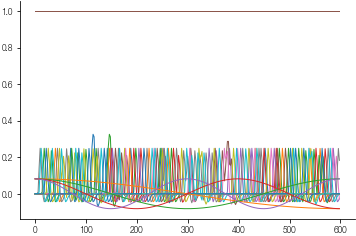

In [27]:
plt.plot(mat)

In [14]:
import nistats.design_matrix as dm
help(dm.make_first_level_design_matrix)


Help on function make_first_level_design_matrix in module nistats.design_matrix:

make_first_level_design_matrix(frame_times, events=None, hrf_model='glover', drift_model='cosine', high_pass=0.01, drift_order=1, fir_delays=[0], add_regs=None, add_reg_names=None, min_onset=-24, oversampling=50)
    Generate a design matrix from the input parameters
    
    Parameters
    ----------
    frame_times : array of shape (n_frames,)
        The timing of acquisition of the scans in seconds.
    
    events : DataFrame instance, optional
        Events data that describes the experimental paradigm.
         The DataFrame instance might have these keys:
            'onset': column to specify the start time of each events in
                     seconds. An error is raised if this key is missing.
            'trial_type': column to specify per-event experimental conditions
                          identifier. If missing each event are labelled
                          'dummy' and considered to

In [10]:
m = brsa.GBRSA()

In [9]:
from brainiak.reprsimil import brsa
help(brsa.GBRSA)

Help on class GBRSA in module brainiak.reprsimil.brsa:

class GBRSA(BRSA)
 |  GBRSA(n_iter=100, rank=None, auto_nuisance=True, n_nureg=None, nureg_zscore=True, nureg_method='PCA', baseline_single=False, logS_range=1.0, SNR_prior='exp', SNR_bins=21, rho_bins=20, tol=0.0001, optimizer='L-BFGS-B', minimize_options={'gtol': 0.0001, 'disp': False, 'maxiter': 20}, random_state=None, anneal_speed=10)
 |  
 |  Group Bayesian representational Similarity Analysis (GBRSA)
 |  
 |  Given the time series of neural imaging data in a region of interest
 |  (ROI) and the hypothetical neural response (design matrix) to
 |  each experimental condition of interest,
 |  calculate the shared covariance matrix of
 |  the voxels(recording unit)' response to each condition,
 |  and the relative SNR of each voxels.
 |  The relative SNR could be considered as the degree of contribution
 |  of each voxel to this shared covariance matrix.
 |  A correlation matrix converted from the covariance matrix
 |  will be p

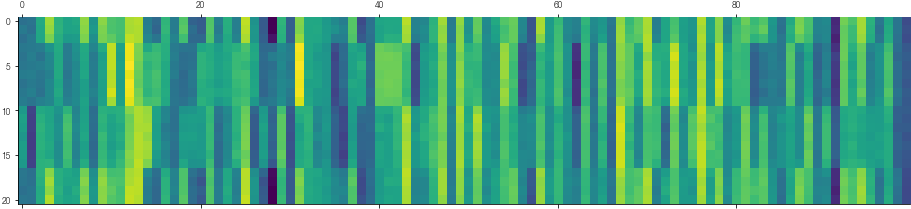

In [49]:
plt.matshow(estimated_patterns)

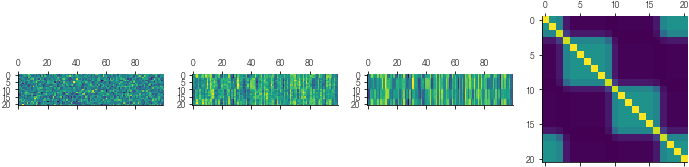

In [35]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
ax[0].matshow(patterns);
ax[1].matshow(learned_patterns);
ax[2].matshow(estimated_patterns);
ax[3].matshow(srm);

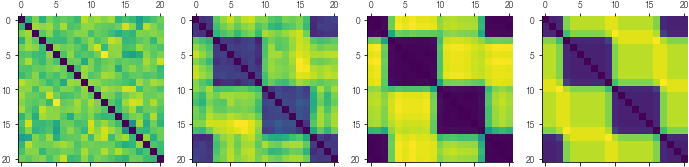

In [36]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
ax[0].matshow(sd.squareform(sd.pdist(patterns, 'correlation')));
ax[1].matshow(sd.squareform(sd.pdist(learned_patterns, 'correlation')));
ax[2].matshow(sd.squareform(sd.pdist(estimated_patterns, 'correlation')));
ax[3].matshow(sd.squareform(sd.pdist(srm, 'correlation')));

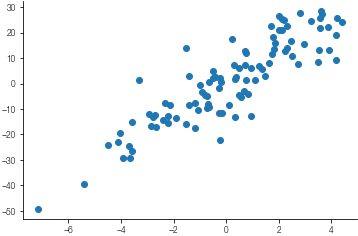

In [37]:
plt.scatter(learned_patterns[0], estimated_patterns[0]);